In [8]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error

In [9]:
df = pd.read_csv('eda_data.csv')

In [10]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [11]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided',
             'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]

# get dummy data 
df_dum = pd.get_dummies(df_model)

In [12]:
X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-20.766855128927006

### Lasso Regression

,alpha,error
12,0.13,-19.257798


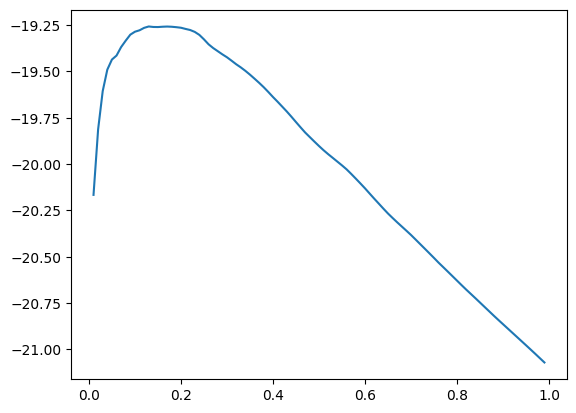

In [14]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

### Random Forest

In [15]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-14.775406732297592

In [16]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

c:\Users\rogha\anaconda3\envs\sin\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\rogha\anaconda3\envs\sin\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
c:\Users\rogha\anaconda3\envs\sin\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

RandomForestRegressor(max_features='auto', n_estimators=150)

In [17]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

print(mean_absolute_error(y_test,tpred_lm))
print(mean_absolute_error(y_test,tpred_lml))
print(mean_absolute_error(y_test,tpred_rf))


18.855189990209762
19.665303712749914
10.975771812080536


In [ ]:
final= []

for i in range(0,X_test.shape[0]):
    final.append(gs.best_estimator_.predict(np.array(list(X_test.iloc[i,:])).reshape(1,-1))[0])

In [33]:
final

[114.02,
 53.53333333333333,
 152.11333333333334,
 123.46,
 152.25666666666666,
 114.90666666666667,
 137.68,
 51.086666666666666,
 55.67,
 69.98333333333333,
 161.57666666666665,
 61.71333333333333,
 109.41333333333333,
 112.65333333333334,
 100.17333333333333,
 136.72666666666666,
 59.11333333333334,
 69.24666666666667,
 105.68333333333334,
 98.17,
 113.37,
 143.67,
 150.01,
 112.3,
 136.81666666666666,
 104.86666666666666,
 65.14333333333333,
 145.71666666666667,
 104.04,
 99.24333333333334,
 94.93333333333334,
 54.733333333333334,
 125.65,
 105.18,
 106.63333333333334,
 88.69,
 87.64,
 111.84333333333333,
 66.29666666666667,
 118.34333333333333,
 196.7,
 122.35333333333334,
 90.41333333333333,
 80.32666666666667,
 161.99666666666667,
 81.96,
 136.94,
 120.46333333333334,
 129.98,
 104.30666666666667,
 128.87,
 77.26666666666667,
 77.02,
 104.23666666666666,
 83.99333333333334,
 119.1,
 90.41333333333333,
 70.74,
 235.49,
 139.16333333333333,
 115.47333333333333,
 91.55,
 102.62,
 1